In [13]:
experiment = 'iu_x_transformer+_ca30_dropout0.5/log'
log_text= open("./experiments/"+experiment+".txt", "r")
dfssdlkfj =log_text.readlines()
print(len(dfssdlkfj))
log= "".join(dfssdlkfj)
log_text.close()

7959


In [14]:
print(log)

[INFO: 2022-02-16 14:42:43,764] Training with config:
[INFO: 2022-02-16 14:42:43,766] {'DATA_LOADER': {'ALL_ID': './iu/txt/iu_all_image_id.txt',
                 'CROP_SIZE': 448,
                 'DROP_LAST': True,
                 'INPUT_SEQ_PATH': './iu/sent/iu_train_input.pkl',
                 'LEVERAGE_NORMAL': 'CA',
                 'MAX_FEAT': 392,
                 'NORMAL_ID': './iu/txt/iu_normal_image_id.txt',
                 'NUM_CA': 30,
                 'NUM_WORKERS': 4,
                 'PIN_MEMORY': True,
                 'RESIZE': 512,
                 'SEQ_PER_IMG': 1,
                 'SHUFFLE': True,
                 'TARGET_SEQ_PATH': './iu/sent/iu_train_target.pkl',
                 'TEST_GV_FEAT': '',
                 'TEST_ID': './iu/txt/iu_test_image_id.txt',
                 'TEST_INPUT_IMAGES': './iu/input_images',
                 'TEST_NORMAL_IMAGES': './iu/normal_images/full_tensor',
                 'TRAIN_GV_FEAT': '',
                 'TRAIN_ID': './iu/

In [15]:
import re
epoch_pat = "Epoch \([A-Z]+\)\d+"
epoch_p = re.compile(epoch_pat)
epoch_result = epoch_p.findall(log)
print(len(epoch_result))
print(epoch_result[:10])

150
['Epoch (VAL)1', 'Epoch (TEST)1', 'Epoch (VAL)2', 'Epoch (TEST)2', 'Epoch (VAL)3', 'Epoch (TEST)3', 'Epoch (VAL)4', 'Epoch (TEST)4', 'Epoch (VAL)5', 'Epoch (TEST)5']


In [16]:
score_pat = "'Bleu_1': \d+.\d+e*-*\d*, 'Bleu_2': \d+.\d+e*-*\d*, 'Bleu_3': \d+.\d+e*-*\d*, 'Bleu_4': \d+.\d+e*-*\d*, 'METEOR': \d+.\d+e*-*\d*, 'ROUGE_L': \d+.\d+e*-*\d*, 'CIDEr': \d+.\d+e*-*\d*"
score_p = re.compile(score_pat)
score_result = score_p.findall(log)
print(len(score_result))
print(score_result)

150
["'Bleu_1': 0.03599053214421497, 'Bleu_2': 0.019354143062080532, 'Bleu_3': 0.010051681717282978, 'Bleu_4': 0.0036336721862897207, 'METEOR': 0.04151045728956936, 'ROUGE_L': 0.06993456866924995, 'CIDEr': 1.6714689863366942e-05", "'Bleu_1': 0.03555573824399796, 'Bleu_2': 0.019086384192299723, 'Bleu_3': 0.009943746207586784, 'Bleu_4': 0.003461828631336404, 'METEOR': 0.04030218369551406, 'ROUGE_L': 0.06823833168042216, 'CIDEr': 0.0010043294589451082", "'Bleu_1': 0.05049945786328811, 'Bleu_2': 0.03183225735496136, 'Bleu_3': 0.021074412779134837, 'Bleu_4': 0.01353795280698437, 'METEOR': 0.06785705005333549, 'ROUGE_L': 0.1048292641439479, 'CIDEr': 0.014917171196877597", "'Bleu_1': 0.05337919770348058, 'Bleu_2': 0.03203141999697107, 'Bleu_3': 0.021071301991496007, 'Bleu_4': 0.013527393311483924, 'METEOR': 0.0665785402547023, 'ROUGE_L': 0.11352427032340508, 'CIDEr': 0.012927409531943337", "'Bleu_1': 0.06919185584681489, 'Bleu_2': 0.043670778182192026, 'Bleu_3': 0.02770311364207306, 'Bleu_4':

In [17]:
score_rows = []
score_rows_val = []
for i, score in enumerate(score_result):
    row = []
    row_val = []
    if '(TEST)' in epoch_result[i]:
        p = re.compile('\d+')
        epoch = p.findall(epoch_result[i])[0]
        row.append(epoch)
        scores = []
        p = re.compile('\d+.\d+e*-*\d*')
        row.extend(p.findall(score))
        score_rows.append(row)
    elif '(VAL)' in epoch_result[i]:
        p = re.compile('\d+')
        epoch = p.findall(epoch_result[i])[0]
        row_val.append(epoch)
        scores = []
        p = re.compile('\d+.\d+e*-*\d*')
        row_val.extend(p.findall(score))
        score_rows_val.append(row_val)
    #print("score_rows:", score_rows)

In [18]:
import csv
with open("./experiments/"+experiment+".csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Epoch','Bleu_1','Bleu_2','Bleu_3','Bleu_4','METEOR','ROUGE_L','CIDEr'])
    for score in score_rows:
        writer.writerow(score)

In [19]:
with open("./experiments/"+experiment+"_val.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Epoch','Bleu_1','Bleu_2','Bleu_3','Bleu_4','METEOR','ROUGE_L','CIDEr'])
    for score in score_rows_val:
        writer.writerow(score)

# Loss

In [20]:
import re
loss_pat = "LabelSmoothing Loss = \d+.\d+"  # "CrossEntropy Loss = \d+.\d+"
loss_p = re.compile(loss_pat)
loss_result = loss_p.findall(log)
print(len(loss_result))
print(loss_result[:10])

3606
['LabelSmoothing Loss = 6.919795989990234', 'LabelSmoothing Loss = 6.951554298400879', 'LabelSmoothing Loss = 6.945693016052246', 'LabelSmoothing Loss = 6.908546447753906', 'LabelSmoothing Loss = 6.938315391540527', 'LabelSmoothing Loss = 6.90019416809082', 'LabelSmoothing Loss = 6.918609142303467', 'LabelSmoothing Loss = 6.754445552825928', 'LabelSmoothing Loss = 6.977380275726318', 'LabelSmoothing Loss = 6.889980316162109']


In [21]:
loss_pat = "\d+.\d+"
loss_p = re.compile(loss_pat)
loss = loss_p.findall(" ".join(loss_result))
print(len(loss))
print(loss[:10])

3606
['6.919795989990234', '6.951554298400879', '6.945693016052246', '6.908546447753906', '6.938315391540527', '6.90019416809082', '6.918609142303467', '6.754445552825928', '6.977380275726318', '6.889980316162109']


In [22]:
loss_float = []
for l in loss:
    loss_float.append(float(l))
print(loss_float[:10])
print(min(loss_float))
loss_float.index(min(loss_float))

[6.919795989990234, 6.951554298400879, 6.945693016052246, 6.908546447753906, 6.938315391540527, 6.90019416809082, 6.918609142303467, 6.754445552825928, 6.977380275726318, 6.889980316162109]
0.2945133149623871


2910

In [23]:
idx = []
for i in range(0, len(loss)):
    idx.append(i)
print(len(idx))

3606


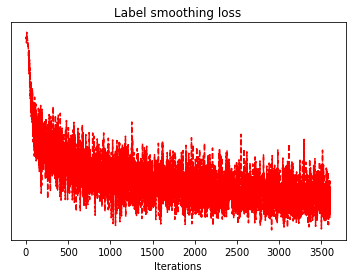

In [24]:
import matplotlib.pyplot as plt
plt.plot(idx, loss_float, 'r--' )
plt.title('Label smoothing loss')
plt.xlabel('Iterations', fontsize=10)
#plt.ylabel('Loss', fontsize=10)

ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

# Analysis

## 1. X_Transformer(mimic)

In [1]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
root='./experiments/xtransformer'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [3]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [4]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [5]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,175,0.387451,0.257668,0.179389,0.130434,0.232736,0.332429,0.285342
1,175,0.387451,0.257668,0.179389,0.130434,0.232736,0.332429,0.285342
2,125,0.380585,0.256397,0.181555,0.134096,0.229927,0.338627,0.291803
3,125,0.380585,0.256397,0.181555,0.134096,0.229927,0.338627,0.291803
4,233,0.377428,0.255548,0.180973,0.134017,0.233230,0.342638,0.309591
5,70,0.306219,0.220519,0.164565,0.126747,0.218107,0.352799,0.358382
6,37,0.259697,0.184385,0.136768,0.105231,0.192482,0.344987,0.414077


# XTransformer(End-to-End)

## One-Resnet(Baseline)

In [11]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [12]:
root='./experiments/xtransformer_pair'
log_val_path=os.path.join(root, 'log_val.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [13]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [14]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [15]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,22,0.305479,0.215439,0.160601,0.124498,0.207296,0.330040,0.429666
1,22,0.305479,0.215439,0.160601,0.124498,0.207296,0.330040,0.429666
2,22,0.305479,0.215439,0.160601,0.124498,0.207296,0.330040,0.429666
3,22,0.305479,0.215439,0.160601,0.124498,0.207296,0.330040,0.429666
4,32,0.305421,0.214475,0.159297,0.122980,0.207539,0.330397,0.430449
5,17,0.219380,0.161252,0.124058,0.097925,0.187272,0.346611,0.363119
6,23,0.299751,0.210692,0.156487,0.120768,0.207023,0.331106,0.474111


## One-Dense

In [16]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [17]:
root='./experiments/xtransformer_one_dense'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [18]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [19]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [20]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,79,0.320604,0.222350,0.158737,0.115587,0.212959,0.337769,0.208471
1,81,0.320542,0.222876,0.159496,0.116727,0.214547,0.337975,0.221249
2,81,0.320542,0.222876,0.159496,0.116727,0.214547,0.337975,0.221249
3,98,0.312375,0.219953,0.159151,0.117988,0.211073,0.341805,0.235747
4,81,0.320542,0.222876,0.159496,0.116727,0.214547,0.337975,0.221249
5,327,0.297130,0.210579,0.153614,0.115365,0.206356,0.345371,0.304757
6,277,0.289783,0.205692,0.150379,0.113322,0.202769,0.345033,0.341677


## No-Dense

In [21]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [22]:
root='./experiments/xtransformer_no_dense'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [23]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [24]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [25]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,39,0.315976,0.219718,0.156637,0.114772,0.209438,0.333612,0.239103
1,39,0.315976,0.219718,0.156637,0.114772,0.209438,0.333612,0.239103
2,39,0.315976,0.219718,0.156637,0.114772,0.209438,0.333612,0.239103
3,39,0.315976,0.219718,0.156637,0.114772,0.209438,0.333612,0.239103
4,39,0.315976,0.219718,0.156637,0.114772,0.209438,0.333612,0.239103
5,186,0.273296,0.195535,0.144807,0.110978,0.197604,0.348650,0.321220
6,169,0.274715,0.195587,0.144465,0.110323,0.197260,0.347943,0.321523


## One_Dense_x4_ImageNet

In [69]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [70]:
root='./experiments/xtransformer_one_dense_x4'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [71]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [72]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [73]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,35,0.191808,0.142973,0.108382,0.082824,0.172801,0.340363,0.273473
1,35,0.191808,0.142973,0.108382,0.082824,0.172801,0.340363,0.273473
2,35,0.191808,0.142973,0.108382,0.082824,0.172801,0.340363,0.273473
3,35,0.191808,0.142973,0.108382,0.082824,0.172801,0.340363,0.273473
4,35,0.191808,0.142973,0.108382,0.082824,0.172801,0.340363,0.273473
5,35,0.191808,0.142973,0.108382,0.082824,0.172801,0.340363,0.273473
6,35,0.191808,0.142973,0.108382,0.082824,0.172801,0.340363,0.273473


## One_Dense_x4_ChexPERT

In [74]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [75]:
root='./experiments/x_transformer_one_dense_x4_CheXpert'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [76]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [77]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [78]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,17,0.331528,0.229141,0.163418,0.119533,0.215178,0.336627,0.235689
1,17,0.331528,0.229141,0.163418,0.119533,0.215178,0.336627,0.235689
2,17,0.331528,0.229141,0.163418,0.119533,0.215178,0.336627,0.235689
3,25,0.297378,0.213104,0.157771,0.120700,0.206212,0.349054,0.355076
4,17,0.331528,0.229141,0.163418,0.119533,0.215178,0.336627,0.235689
5,63,0.272937,0.193980,0.143585,0.109924,0.198882,0.351452,0.312963
6,25,0.297378,0.213104,0.157771,0.120700,0.206212,0.349054,0.355076


(2차학습)

## Pair_Dense_x2_ChexPERT_Detach-Normal

In [45]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [46]:
root='./experiments/x_transformer_pair_dense_x2_CheXpert_fc'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [47]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [48]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [49]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,200,0.324600,0.223651,0.160046,0.118637,0.216100,0.348056,0.312396
1,61,0.320386,0.226957,0.164734,0.123809,0.214949,0.347416,0.301699
2,61,0.320386,0.226957,0.164734,0.123809,0.214949,0.347416,0.301699
3,61,0.320386,0.226957,0.164734,0.123809,0.214949,0.347416,0.301699
4,200,0.324600,0.223651,0.160046,0.118637,0.216100,0.348056,0.312396
5,174,0.307176,0.214309,0.156726,0.118969,0.212167,0.354644,0.335476
6,141,0.303408,0.214122,0.157629,0.120723,0.210367,0.353160,0.343146


## Pair_Dense_x2_ChexPERT_fc+en

In [4]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [35]:
root='./experiments/x_transformer_pair_dense_x2_CheXpert_fc_en'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [36]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [37]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

# 512-Verision

## Pair_Dense_x2_ChexPERT_fc+en ++

In [5]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [6]:
root='./experiments/x_transformer+_pair_dense_x2_CheXpert_no'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [7]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [8]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [9]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,69,0.359409,0.242989,0.170001,0.122624,0.227001,0.335866,0.183835
1,117,0.357664,0.245415,0.176054,0.131798,0.222965,0.346946,0.357867
2,117,0.357664,0.245415,0.176054,0.131798,0.222965,0.346946,0.357867
3,117,0.357664,0.245415,0.176054,0.131798,0.222965,0.346946,0.357867
4,69,0.359409,0.242989,0.170001,0.122624,0.227001,0.335866,0.183835
5,16,0.267485,0.197016,0.149277,0.115357,0.202126,0.356521,0.338189
6,360,0.332045,0.229208,0.166999,0.126630,0.212787,0.343812,0.395780


## Pair_Dense_x2_ChexPERT_fc+en ++ (2stage, not SCSL)

In [10]:
root='./experiments/x_transformer+_pair_dense_x2_CheXpert_no_2stage'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [11]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [12]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [13]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
1,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
2,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
3,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
4,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
5,3,0.328741,0.229285,0.166524,0.126304,0.213787,0.352006,0.349572
6,52,0.318453,0.218960,0.158938,0.120539,0.209633,0.350044,0.362956


## Pair_Dense_x2_ChexPERT_fc+en ++ (2stage, yes SCSL)

In [38]:
root='./experiments/x_transformer+_pair_dense_x2_CheXpert_no_2stage'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [39]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [40]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [41]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
1,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
2,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
3,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
4,136,0.372686,0.253315,0.179351,0.131907,0.229081,0.340140,0.286912
5,3,0.328741,0.229285,0.166524,0.126304,0.213787,0.352006,0.349572
6,52,0.318453,0.218960,0.158938,0.120539,0.209633,0.350044,0.362956


## Random_Dense_x2_ChexPERT_fc+en ++

In [42]:
root='./experiments/x_transformer+_random_dense_x2_CheXpert_no'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [43]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [44]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [45]:
bold_best #119

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,286,0.376090,0.253783,0.180947,0.135200,0.225442,0.347635,0.394136
1,119,0.374865,0.257306,0.183774,0.135527,0.230028,0.342997,0.325087
2,119,0.374865,0.257306,0.183774,0.135527,0.230028,0.342997,0.325087
3,51,0.353187,0.247110,0.181482,0.138786,0.223846,0.354642,0.356401
4,119,0.374865,0.257306,0.183774,0.135527,0.230028,0.342997,0.325087
5,59,0.338299,0.236180,0.172575,0.131069,0.219699,0.360458,0.381152
6,186,0.344898,0.235199,0.170488,0.129580,0.218335,0.347356,0.411264


## No_Dense_x2_ChexPERT_fc+en ++

In [46]:
root='./experiments/x_transformer+_no_dense_x2_Chexpert'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [47]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [48]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [49]:
bold_best # 88

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,399,0.370591,0.235473,0.159197,0.112898,0.220751,0.310487,0.159908
1,88,0.356252,0.243313,0.172691,0.126458,0.224358,0.339022,0.262737
2,65,0.350816,0.241980,0.173056,0.127232,0.220753,0.340465,0.283285
3,81,0.338432,0.233178,0.168740,0.127268,0.219293,0.346632,0.358616
4,88,0.356252,0.243313,0.172691,0.126458,0.224358,0.339022,0.262737
5,52,0.324476,0.227995,0.167191,0.126706,0.216311,0.349634,0.371363
6,52,0.324476,0.227995,0.167191,0.126706,0.216311,0.349634,0.371363


## Random_Dense_x2_ImageNet_fc+en ++

In [18]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [19]:
root='./experiments/x_transformer+_random_dense_x2_ImageNet_no'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [20]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [21]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [22]:
bold_best # 234

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,218,0.390012,0.253700,0.174012,0.124374,0.227515,0.316377,0.165638
1,218,0.390012,0.253700,0.174012,0.124374,0.227515,0.316377,0.165638
2,234,0.372018,0.249205,0.175830,0.129558,0.225142,0.327915,0.208479
3,234,0.372018,0.249205,0.175830,0.129558,0.225142,0.327915,0.208479
4,254,0.377074,0.252837,0.175815,0.127158,0.228151,0.326920,0.223946
5,303,0.346218,0.238053,0.171316,0.128457,0.217269,0.341395,0.346330
6,331,0.331932,0.223138,0.159098,0.119082,0.211295,0.330647,0.358116


## random_dense_x2_CheXpert_(no)detach ++

In [27]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [28]:
root='./experiments/x_transformer+_random_dense_x2_CheXpert_nodetach'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [29]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [30]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [31]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,73,0.365859,0.244612,0.170726,0.123503,0.226417,0.337395,0.253027
1,45,0.361976,0.245710,0.175385,0.131572,0.223302,0.344529,0.380481
2,86,0.359797,0.245210,0.176520,0.132613,0.225531,0.345665,0.390443
3,58,0.354671,0.243139,0.175938,0.133775,0.222093,0.352388,0.404952
4,81,0.365580,0.244965,0.171528,0.123932,0.227182,0.334288,0.254766
5,26,0.319458,0.223396,0.164771,0.125822,0.214500,0.353596,0.382781
6,58,0.354671,0.243139,0.175938,0.133775,0.222093,0.352388,0.404952


## CA10_dense_x2_CheXpert_no ++

In [ ]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [21]:
root='./experiments/x_transformer+_ca_dense_x2_CheXpert_no'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [22]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [23]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [24]:
bold_best # 34

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,305,0.383706,0.241341,0.162806,0.115420,0.222212,0.314283,0.204477
1,53,0.363147,0.248755,0.177906,0.132371,0.224689,0.345253,0.268457
2,34,0.354621,0.248030,0.178939,0.133246,0.227910,0.347526,0.255577
3,34,0.354621,0.248030,0.178939,0.133246,0.227910,0.347526,0.255577
4,47,0.353337,0.241143,0.172239,0.127981,0.229392,0.348762,0.263717
5,22,0.312410,0.224150,0.167595,0.128011,0.215042,0.359851,0.346491
6,22,0.312410,0.224150,0.167595,0.128011,0.215042,0.359851,0.346491


## CA10_dense_x4_CheXpert_no ++

In [15]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [16]:
root='./experiments/x_transformer+_ca10_dense_x4_CheXpert_no'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [17]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [18]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [20]:
bold_best

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,116,0.371524,0.247363,0.172465,0.125445,0.226573,0.332185,0.216404
1,109,0.367602,0.250133,0.179106,0.134259,0.224810,0.343650,0.287585
2,109,0.367602,0.250133,0.179106,0.134259,0.224810,0.343650,0.287585
3,109,0.367602,0.250133,0.179106,0.134259,0.224810,0.343650,0.287585
4,55,0.348388,0.238821,0.168743,0.122732,0.226709,0.337385,0.248267
5,135,0.330002,0.229247,0.167481,0.127851,0.214435,0.354467,0.396587
6,348,0.300038,0.202243,0.147795,0.113752,0.202084,0.325507,0.410693


## CA30_dense_x2_CheXpert_no ++

In [21]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [22]:
root='./experiments/x_transformer+_ca30_dense_x2_CheXpert_no'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [23]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [24]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [ ]:
bold_best # 94i

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,47,0.382924,0.257954,0.181299,0.132113,0.234652,0.340306,0.261855
1,47,0.382924,0.257954,0.181299,0.132113,0.234652,0.340306,0.261855
2,94,0.368318,0.255517,0.184282,0.137501,0.231405,0.352337,0.368945
3,99,0.370934,0.254703,0.183628,0.137801,0.231497,0.352262,0.363529
4,47,0.382924,0.257954,0.181299,0.132113,0.234652,0.340306,0.261855
5,35,0.335786,0.232653,0.170069,0.129806,0.221176,0.357582,0.336038
6,155,0.362555,0.248336,0.180371,0.136987,0.225081,0.350388,0.400146


# 여기부터 pre-project

## CA30_512_dense_x2_CheXpert_fc ++

In [22]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [23]:
root='./experiments/x_transformer+_ca30_512_dense_x2_CheXpert_fc'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [24]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [25]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [26]:
bold_best # 70

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,108,0.376295,0.250974,0.175075,0.127002,0.225808,0.341031,0.256697
1,108,0.376295,0.250974,0.175075,0.127002,0.225808,0.341031,0.256697
2,22,0.354148,0.247072,0.180303,0.135978,0.226283,0.349464,0.281989
3,93,0.353829,0.244102,0.178536,0.136013,0.221016,0.352587,0.316722
4,102,0.363841,0.242793,0.170380,0.124846,0.226473,0.341931,0.257182
5,40,0.315172,0.222786,0.165606,0.127727,0.214501,0.356624,0.357628
6,70,0.353148,0.241741,0.177112,0.135472,0.218202,0.353922,0.403598


## CA30_512_dense_x2_CheXpert_fc_noconcat++

In [27]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [32]:
root='./experiments/x_transformer+_ca30_512_dense_x2_CheXpert_fc_noconcat'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [33]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [34]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [35]:
bold_best # 109

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,112,0.367562,0.249394,0.177260,0.131537,0.223243,0.342119,0.268885
1,109,0.363032,0.250444,0.181530,0.136285,0.221706,0.346920,0.343168
2,109,0.363032,0.250444,0.181530,0.136285,0.221706,0.346920,0.343168
3,109,0.363032,0.250444,0.181530,0.136285,0.221706,0.346920,0.343168
4,106,0.357598,0.245796,0.178253,0.133994,0.226456,0.347640,0.358066
5,24,0.313936,0.228304,0.172073,0.132914,0.220390,0.357755,0.297641
6,138,0.350222,0.239237,0.172101,0.128941,0.222392,0.345456,0.367672


## x_transformer+_ca30BiP_512_dense_x2_CheXpert_fc_dropout_schedule/+

In [9]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [10]:
root='./experiments/x_transformer+_ca30BiP_512_dense_x2_CheXpert_fc_dropout_schedule/'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [11]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [12]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [13]:
bold_best # 24

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,388,0.380711,0.241849,0.164074,0.114771,0.225231,0.307912,0.147974
1,388,0.380711,0.241849,0.164074,0.114771,0.225231,0.307912,0.147974
2,24,0.330440,0.234749,0.175902,0.135251,0.218037,0.351760,0.330815
3,24,0.330440,0.234749,0.175902,0.135251,0.218037,0.351760,0.330815
4,388,0.380711,0.241849,0.164074,0.114771,0.225231,0.307912,0.147974
5,69,0.318462,0.223557,0.164635,0.125671,0.214454,0.352472,0.342698
6,100,0.343950,0.229614,0.161468,0.118733,0.217608,0.340185,0.342700


## x_transformer+_ca30_512_dense_x2_CheXpert_fc_dropout_schedule

In [25]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [26]:
root='./experiments/x_transformer+_ca30_512_dense_x2_CheXpert_fc_dropout_schedule/'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [27]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [28]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [51]:
bold_best # 109

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,169,0.379745,0.261974,0.190057,0.143036,0.230126,0.347358,0.383468
1,169,0.379745,0.261974,0.190057,0.143036,0.230126,0.347358,0.383468
2,169,0.379745,0.261974,0.190057,0.143036,0.230126,0.347358,0.383468
3,167,0.363466,0.255381,0.187278,0.143328,0.226238,0.351060,0.427266
4,169,0.379745,0.261974,0.190057,0.143036,0.230126,0.347358,0.383468
5,24,0.329043,0.239179,0.179779,0.138005,0.224116,0.366952,0.331240
6,167,0.363466,0.255381,0.187278,0.143328,0.226238,0.351060,0.427266


## x_transformer+_ca10_768_dense_x2_CheXpert_fc

In [52]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [53]:
root='./experiments/x_transformer+_ca10_768_dense_x2_CheXpert_fc/'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [54]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [55]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [56]:
bold_best # 109

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,60,0.299345,0.206293,0.146513,0.106663,0.201947,0.327486,0.234511
1,25,0.298635,0.208436,0.149314,0.109948,0.203322,0.332357,0.264182
2,25,0.298635,0.208436,0.149314,0.109948,0.203322,0.332357,0.264182
3,25,0.298635,0.208436,0.149314,0.109948,0.203322,0.332357,0.264182
4,25,0.298635,0.208436,0.149314,0.109948,0.203322,0.332357,0.264182
5,117,0.263903,0.183362,0.133782,0.100972,0.190379,0.334071,0.265469
6,33,0.185478,0.126932,0.093134,0.071823,0.166171,0.318165,0.309278


## x_transformer+_ca10BiP_768_dense_x2_Chexpert_fc

In [57]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [62]:
root='./experiments/x_transformer+_ca10BiP_768_dense_x2_Chexpert_fc/'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [63]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [64]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [65]:
bold_best # 109

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,45,0.364816,0.246327,0.173274,0.125569,0.227719,0.341502,0.273409
1,112,0.361328,0.248206,0.175298,0.127373,0.223365,0.342713,0.244963
2,41,0.346005,0.242184,0.177997,0.136441,0.210943,0.345650,0.333017
3,41,0.346005,0.242184,0.177997,0.136441,0.210943,0.345650,0.333017
4,45,0.364816,0.246327,0.173274,0.125569,0.227719,0.341502,0.273409
5,24,0.313614,0.223871,0.164426,0.124317,0.216897,0.355243,0.267273
6,50,0.346635,0.241936,0.177494,0.135414,0.223639,0.355195,0.393643


## x_transformer+_random_768_dense_x2_CheXpert_fc

In [66]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [67]:
root='./experiments/x_transformer+_random_768_dense_x2_CheXpert_fc/'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [68]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [69]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [70]:
bold_best # 109

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,325,0.370663,0.254142,0.180322,0.131034,0.225965,0.335531,0.255504
1,325,0.370663,0.254142,0.180322,0.131034,0.225965,0.335531,0.255504
2,304,0.367644,0.253131,0.180829,0.133003,0.222174,0.338156,0.301323
3,206,0.354527,0.247621,0.180051,0.135577,0.222982,0.349056,0.344732
4,325,0.370663,0.254142,0.180322,0.131034,0.225965,0.335531,0.255504
5,148,0.336748,0.235236,0.171130,0.128178,0.217470,0.349165,0.347079
6,366,0.343732,0.241335,0.176282,0.132676,0.218380,0.347697,0.397143


## x_transformer+_ca30_512_dense_x2_CheXpert_fc_dropout_schedule_concat

In [8]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [9]:
root='./experiments/x_transformer+_ca30_512_dense_x2_CheXpert_fc_dropout_schedule_concat/'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [10]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [11]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [12]:
bold_best # 36

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,106,0.392538,0.271221,0.196499,0.147485,0.234646,0.350003,0.369026
1,106,0.392538,0.271221,0.196499,0.147485,0.234646,0.350003,0.369026
2,106,0.392538,0.271221,0.196499,0.147485,0.234646,0.350003,0.369026
3,24,0.360923,0.258474,0.193326,0.148531,0.230451,0.369010,0.331680
4,106,0.392538,0.271221,0.196499,0.147485,0.234646,0.350003,0.369026
5,24,0.360923,0.258474,0.193326,0.148531,0.230451,0.369010,0.331680
6,155,0.341331,0.230019,0.167435,0.128559,0.221127,0.338896,0.445863


## x_transformer+_ca50_512_dense_x2_CheXpert_fc_dropout_schedule

In [13]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [14]:
root='./experiments/x_transformer+_ca50_512_dense_x2_CheXpert_fc_dropout_schedule/'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [15]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [16]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [17]:
bold_best # 36

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,273,0.383505,0.243192,0.163935,0.114503,0.219716,0.304645,0.197786
1,73,0.370044,0.254802,0.182976,0.135586,0.215295,0.337221,0.227114
2,36,0.353092,0.251520,0.184381,0.138948,0.225200,0.354407,0.257398
3,36,0.353092,0.251520,0.184381,0.138948,0.225200,0.354407,0.257398
4,36,0.353092,0.251520,0.184381,0.138948,0.225200,0.354407,0.257398
5,47,0.332531,0.234309,0.172456,0.131865,0.217184,0.354728,0.337589
6,83,0.347833,0.237904,0.173802,0.133262,0.214491,0.347400,0.342859


# IU DATASET

## iu_x_transformer+_ca30_best

In [25]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [26]:
root='./experiments/iu_x_transformer+_ca30_best/'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [27]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [28]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [29]:
bold_best # 36

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,8,0.390551,0.259085,0.176304,0.117493,0.189783,0.331742,0.333802
1,8,0.390551,0.259085,0.176304,0.117493,0.189783,0.331742,0.333802
2,8,0.390551,0.259085,0.176304,0.117493,0.189783,0.331742,0.333802
3,11,0.369803,0.240185,0.170599,0.122841,0.188498,0.321275,0.337532
4,8,0.390551,0.259085,0.176304,0.117493,0.189783,0.331742,0.333802
5,7,0.372116,0.249080,0.172092,0.117585,0.189602,0.338857,0.324915
6,37,0.360329,0.220609,0.149414,0.108349,0.186701,0.298910,0.441676


## iu_x_transformer+_ca30_dropout0.5

In [30]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [31]:
root='./experiments/iu_x_transformer+_ca30_dropout0.5'
log_val_path=os.path.join(root, 'log.csv')

log_val=pd.read_csv(log_val_path)
metrics=log_val.columns

best_epoch=[]
for i in range(1, len(log_val.columns)):
    max_idx=log_val[log_val.columns[i]].idxmax()
    best_epoch.append(max_idx)


In [32]:
best_epoch_by_metric=log_val.iloc[best_epoch]

In [33]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


bold_best=best_epoch_by_metric.reset_index(drop=True).style.apply(highlight_max, props='font-weight:bold')

In [34]:
bold_best # 36

,Epoch,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,17,0.389378,0.240804,0.159985,0.106367,0.192843,0.304696,0.317191
1,8,0.381769,0.249623,0.167003,0.110001,0.185179,0.330140,0.346084
2,8,0.381769,0.249623,0.167003,0.110001,0.185179,0.330140,0.346084
3,5,0.368064,0.243852,0.166645,0.111328,0.180398,0.320541,0.253763
4,17,0.389378,0.240804,0.159985,0.106367,0.192843,0.304696,0.317191
5,7,0.341019,0.219318,0.144704,0.096554,0.179075,0.336230,0.322613
6,8,0.381769,0.249623,0.167003,0.110001,0.185179,0.330140,0.346084
